In [6]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import glob, operator, time, shutil, scipy, sys
import pandas as pd

pd.set_option('display.max_columns', 100)
plt.style.use('classic')

In [7]:
def new_fig(figsize=(8.9, 5)):
    plt.close()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)    
    ax.yaxis.grid(linestyle='--')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(8)
    return ax

In [8]:
# df = pd.read_csv('../data/composed/mira_all.csv')

In [9]:
# data_2015 = df[df.START_TIMESTAMP >= '2015-01-01 00:00:00'][df.START_TIMESTAMP < '2016-01-01 00:00:00']
# data_2016 = df[df.START_TIMESTAMP >= '2016-01-01 00:00:00'][df.START_TIMESTAMP < '2017-01-01 00:00:00']
# data_2017 = df[df.START_TIMESTAMP >= '2017-01-01 00:00:00'][df.START_TIMESTAMP < '2018-01-01 00:00:00']
# data_2018 = df[df.START_TIMESTAMP >= '2018-01-01 00:00:00'][df.START_TIMESTAMP < '2019-01-01 00:00:00']
# data_2019 = df[df.START_TIMESTAMP >= '2019-01-01 00:00:00'][df.START_TIMESTAMP < '2020-01-01 00:00:00']
data_2014 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20140101_20141231.csv')
data_2015 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20150101_20151231.csv')
data_2016 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20160101_20161231.csv')
data_2017 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20170101_20171231.csv')
data_2018 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20180101_20181231.csv')
data_2019 = pd.read_csv('../data/mira_task_logs/ANL-ALCF-TH-MIRA_20190101_20190531.csv')

In [11]:
averageDict = {'year': ['2014', '2015', '2016', '2017', '2018', '2019'],
              'job_id_count': [
                  data_2014.COBALT_JOBID.unique().size,
                  data_2015.COBALT_JOBID.unique().size,
                  data_2016.COBALT_JOBID.unique().size,
                  data_2017.COBALT_JOBID.unique().size,
                  data_2018.COBALT_JOBID.unique().size,
                  data_2019.COBALT_JOBID.unique().size,
              ],
              'task_id_count': [
                  data_2014.CONTROLSYSTEM_TASKID.unique().size,
                  data_2015.CONTROLSYSTEM_TASKID.unique().size,
                  data_2016.CONTROLSYSTEM_TASKID.unique().size,
                  data_2017.CONTROLSYSTEM_TASKID.unique().size,
                  data_2018.CONTROLSYSTEM_TASKID.unique().size,
                  data_2019.CONTROLSYSTEM_TASKID.unique().size
              ]}
averageData = pd.DataFrame(data=averageDict)
averageData['tasks_per_job'] = averageData['task_id_count'] / averageData['job_id_count']
print(averageData)

   year  job_id_count  task_id_count  tasks_per_job
0  2014         76819         558000       7.263828
1  2015         81404         884723      10.868299
2  2016         56234         320712       5.703169
3  2017         42532         359467       8.451683
4  2018         56358         363584       6.451329
5  2019         20426         307397      15.049300


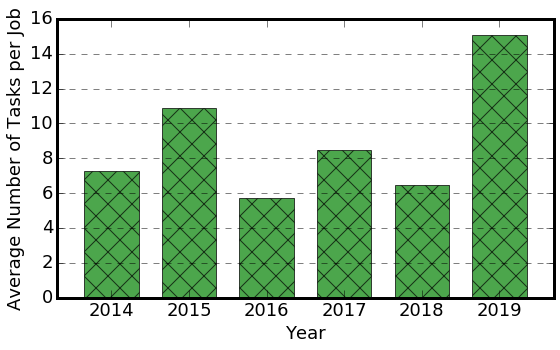

In [12]:
%matplotlib inline
ax = new_fig()
width = .7
plt.bar(x = averageData["year"], 
        height = averageData["tasks_per_job"],
        width = width,
        align = 'center',
        color = 'green',
        hatch = 'x',
        alpha = .7
        )
plt.xlim(left = -width, right = len(averageData["year"])- (1 - width))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Number of Tasks per Job', fontsize=18)
plt.savefig('../figure/avg_task_per_job.pdf', bbox_inches='tight')
plt.show()

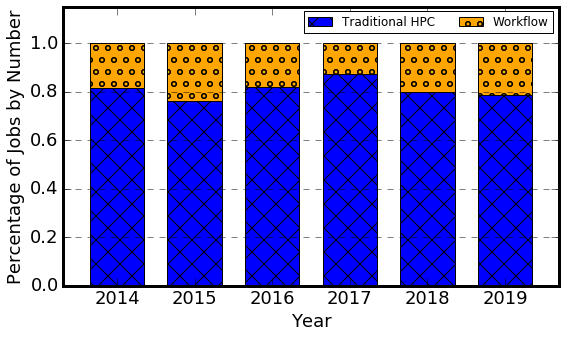

In [16]:
years = [data_2014, data_2015, data_2016, data_2017, data_2018, data_2019]
yearstrings = ['2014', '2015', '2016', '2017', '2018', '2019']
y = {'year': yearstrings, 'Traditional HPC': np.zeros(len(years), dtype=float), 'Workflow': np.zeros(len(years), dtype=float)}
job_task_data = pd.DataFrame(data=y)

for i in range(len(years)):
    one = 0.0
    many = 0.0
    for job in years[i].COBALT_JOBID.unique():
        tasks = years[i][years[i]['COBALT_JOBID'] == job].CONTROLSYSTEM_TASKID.unique().size
        if tasks == 1:
            one += 1.0
        else:
            many += 1.0
    total = one + many
    job_task_data.iat[i, 1] = one / total
    job_task_data.iat[i, 2] = many / total

ax = new_fig()
width = .7
traditional = plt.bar(x = job_task_data["year"], 
        height = job_task_data['Traditional HPC'],
        width = width,
        align = 'center',
        color = 'blue',
        hatch = 'x',
        label = 'Traditional HPC',
        )
workflow = plt.bar(x = job_task_data["year"], 
        height = job_task_data['Workflow'],
        bottom = job_task_data['Traditional HPC'],
        width = width,
        align = 'center',
        color = 'orange',
        hatch = 'o',
        label = 'Workflow',
        )
plt.xlabel('Year', fontsize=18)
plt.xlim(left = -width, right = len(years)-(1-width))
plt.ylim(bottom = 0, top = 1.15)
plt.ylabel('Percentage of Jobs by Number', fontsize=18)
ax.legend(bbox_to_anchor = (1, 1.007), ncol = 2)
plt.savefig('../figure/hpc_usage_num.pdf', bbox_inches='tight')
plt.show()

In [17]:
print(job_task_data)

   year  Traditional HPC  Workflow
0  2014         0.817090  0.182910
1  2015         0.762813  0.237187
2  2016         0.821229  0.178771
3  2017         0.875035  0.124965
4  2018         0.798360  0.201640
5  2019         0.785616  0.214384


In [18]:
djc_2014 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20140101_20141231.csv')
djc_2015 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20150101_20151231.csv')
djc_2016 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20160101_20161231.csv')
djc_2017 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20170101_20171231.csv')
djc_2018 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20180101_20181231.csv')
djc_2019 = pd.read_csv('../data/mira_djc_logs/ANL-ALCF-DJC-MIRA_20190101_20190531.csv')

In [20]:
djc_2014.set_index('COBALT_JOBID', inplace=True)
djc_2015.set_index('COBALT_JOBID', inplace=True)
djc_2016.set_index('COBALT_JOBID', inplace=True)
djc_2017.set_index('COBALT_JOBID', inplace=True)
djc_2018.set_index('COBALT_JOBID', inplace=True)
djc_2019.set_index('COBALT_JOBID', inplace=True)

In [24]:
combined_2014 = data_2014.join(other=djc_2014, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')
combined_2015 = data_2015.join(other=djc_2015, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')
combined_2016 = data_2016.join(other=djc_2016, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')
combined_2017 = data_2017.join(other=djc_2017, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')
combined_2018 = data_2018.join(other=djc_2018, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')
combined_2019 = data_2019.join(other=djc_2019, on='COBALT_JOBID', how='inner', lsuffix='_ts', rsuffix='_dcj')

In [32]:
# combined_2016.describe()

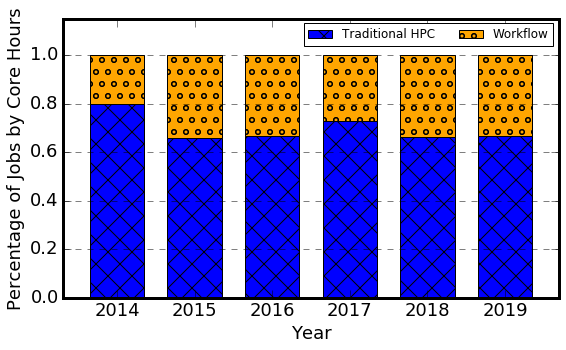

In [34]:
years = [combined_2014, combined_2015, combined_2016, combined_2017, combined_2018, combined_2019]
yearstrings = ['2014', '2015', '2016', '2017', '2018', '2019']
y = {'year': yearstrings, 'Traditional HPC': np.zeros(len(years), dtype=float), 'Workflow': np.zeros(len(years), dtype=float)}
job_task_data = pd.DataFrame(data=y)

for i in range(len(years)):
    one = 0.0
    many = 0.0
    for job in years[i].COBALT_JOBID.unique():
        tasks = years[i][years[i]['COBALT_JOBID'] == job].CONTROLSYSTEM_TASKID.unique().size
        if tasks == 1:
            one += years[i][years[i].COBALT_JOBID == job].iloc[0].USED_CORE_HOURS
        else:
            many += years[i][years[i].COBALT_JOBID == job].iloc[0].USED_CORE_HOURS
    total = one + many
    job_task_data.iat[i, 1] = one / total
    job_task_data.iat[i, 2] = many / total

ax = new_fig()
width = .7
traditional = plt.bar(x = job_task_data["year"], 
        height = job_task_data['Traditional HPC'],
        width = width,
        align = 'center',
        color = 'blue',
        hatch = 'x',
        label = 'Traditional HPC',
        )
workflow = plt.bar(x = job_task_data["year"], 
        height = job_task_data['Workflow'],
        bottom = job_task_data['Traditional HPC'],
        width = width,
        align = 'center',
        color = 'orange',
        hatch = 'o',
        label = 'Workflow',
        )
plt.xlabel('Year', fontsize=18)
plt.xlim(left = -width, right = len(years)-(1-width))
plt.ylim(bottom = 0, top = 1.15)
plt.ylabel('Percentage of Jobs by Core Hours', fontsize=18)
ax.legend(bbox_to_anchor = (1, 1.006), ncol = 2)
plt.savefig('../figure/hpc_usage_ch.pdf', bbox_inches='tight')
plt.show()

In [35]:
print(job_task_data)

   year  Traditional HPC  Workflow
0  2014         0.800274  0.199726
1  2015         0.658678  0.341322
2  2016         0.667557  0.332443
3  2017         0.727023  0.272977
4  2018         0.662108  0.337892
5  2019         0.665404  0.334596


In [62]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']
# y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0.0
#     many = 0.0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#         else:
#             many += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#     total = one + many
#     job_task_data.iat[i, 1] = one / 6870269952
#     job_task_data.iat[i, 2] = many / 6870269952
# job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
#                    title='% Traditional HPC vs. Workflow by Year (Core Hours Used / Total Potential Core Hours Available)')
# print(job_task_data)
# plt.savefig('figure/hpc_usage_ch.png')

In [63]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']
# y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0.0
#     many = 0.0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += years[i][years[i].zero_batchJobId == job].iloc[0].REQUESTED_CORE_HOURS
#         else:
#             many += years[i][years[i].zero_batchJobId == job].iloc[0].REQUESTED_CORE_HOURS
#     total = one + many
#     job_task_data.iat[i, 1] = one / total
#     job_task_data.iat[i, 2] = many / total
# job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
#                    title='% Traditional HPC vs. Workflow by Year (Core Hours Requested)')
# print(job_task_data)

In [64]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019 Extrapolated']
# y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=int), 'Workflow': np.zeros(5, dtype=int)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0
#     many = 0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#         else:
#             many += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#     if (i < 4):
#         job_task_data.iat[i, 1] = one
#     else:
#         job_task_data.iat[i, 1] = one * 3
#     if (i < 4):
#         job_task_data.iat[i, 2] = many
#     else:
#         job_task_data.iat[i,2] = many * 3
# print(job_task_data)
# job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
#                    title='% Traditional HPC vs. Workflow by Year (Core Hours) -- 2019 Extrapolated')

In [65]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']
# y = {'year': yearstrings, 
#      'one': np.zeros(5, dtype=int), 
#      'two': np.zeros(5, dtype=int), 
#      'three': np.zeros(5, dtype=int), 
#      'four': np.zeros(5, dtype=int), 
#      'many': np.zeros(5, dtype=int)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0
#     two = 0
#     three = 0
#     four = 0
#     many = 0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += 1
#         elif tasks == 2:
#             two += 1
#         elif tasks == 3:
#             three +=1
#         elif tasks == 4:
#             four += 1
#         else:
#             many += 1
#     job_task_data.iat[i, 0] = four
#     job_task_data.iat[i, 1] = many
#     job_task_data.iat[i, 2] = one
#     job_task_data.iat[i, 3] = three
#     job_task_data.iat[i, 4] = two
# job_task_data.plot(kind='bar', x='year', y=['one', 'two', 'three', 'four', 'many'], figsize=(15,15))
# print(job_task_data)

In [66]:
# yearsets = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']

# y = {'years': [], 'jobs': [], 'tasks': []}
# for i in range(0, 5):
#     for job in yearsets[i].zero_batchJobId.unique():
#         tasks = yearsets[i][yearsets[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         y['years'].append(yearstrings[i])
#         y['jobs'].append(job)
#         y['tasks'].append(tasks)

# job_task_data = pd.DataFrame(data=y)
# hist = job_task_data.hist(column='tasks', by='years', bins=range(2,job_task_data.tasks.max()), figsize=(20,20));